# Feature Selection Using Stochastic Gates

The method provides a deep neural network that performs feature selection for regression or classifcation tasks.

This tutorial demonstrates the method on an artificial classification task.
The paper appears in: https://arxiv.org/abs/1810.04247


# Installation

In [1]:
#!pip install --user stg

# Importing the model

In [2]:
from model import Model
from data_helper import get_reg_data, create_sin_dataset
import json
from sklearn.model_selection import train_test_split
from utils import DataSet, convertToOneHot, get_date_time
import matplotlib.pyplot as plt
import numpy as np

# Loading parameters

In [3]:
with open('./params/params_SE1_1000_.json', 'r') as f:
    params = json.load(f)
print(params)

{'sigma': 0.5, 'display_step': 1000, 'activation': 'tanh', 'param_search': False, 'output_node': 1, 'feature_selection': True, 'hidden_layers_node': [60, 20, 3], 'learning_rate': 0.01, 'lam': 0.02}


# Creating the data set

In [4]:
n_size = 1000 #Number of samples
p_size = 20   #Number of features
X_data, y_data=create_sin_dataset(n_size,p_size) 

In [5]:
y_data.shape

(1000, 1)

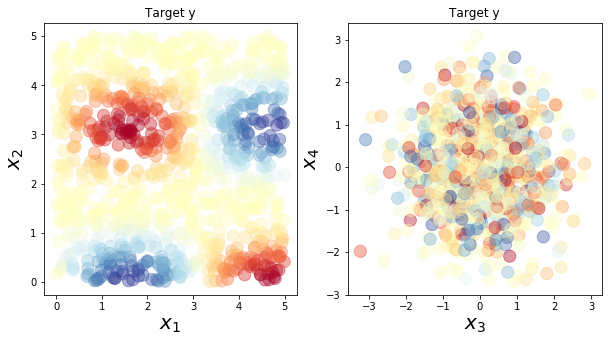

In [43]:
f,ax = plt.subplots(1,2,figsize=(10,5))
        

ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:,2], y=X_data[:,3], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[1].set_xlabel('$x_3$',fontsize=20)
ax[1].set_ylabel('$x_4$',fontsize=20)
ax[1].set_title('Target y')
plt.tick_params(labelsize=10)

# Split data to train, test and validation

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.9)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)


/home/ofir/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



# Adjust parameters

In [33]:
params['lam'] = 0.1
params['learning_rate'] = 0.1
params['input_node'] = X_train.shape[1]
params['batch_size'] = X_train.shape[0]
params['hidden_layers_node']= [500, 50,10, 1]

# Define dataset and loss lists

In [34]:
dataset = DataSet(**{'_data':X_train, '_labels':y_train,
                '_valid_data':X_valid, '_valid_labels':y_valid,
                '_test_data':X_test, '_test_labels':y_test})
train_acc_mat, train_loss_mat = [], []
test_acc_list, test_loss_list = [], []

# Define the model and model_dir

In [35]:
model_dir='tmp'
num_epoch=10000
model = Model(**params)

# Train the model

In [36]:
train_acces, train_losses, val_acces, val_losses = model.train(params['param_search'], dataset, model_dir, num_epoch=num_epoch)

num_samples : 720
Epoch: 1000 train loss=0.235225528 valid loss= 0.234004408
train reg_fs: 0.06758182495832443
Epoch: 2000 train loss=0.114537373 valid loss= 0.106441222
train reg_fs: 0.04205485060811043
Epoch: 3000 train loss=0.061939113 valid loss= 0.057599582
train reg_fs: 0.02442592941224575
Epoch: 4000 train loss=0.034179956 valid loss= 0.032252397
train reg_fs: 0.017433984205126762
Epoch: 5000 train loss=0.016814250 valid loss= 0.017053504
train reg_fs: 0.01448984444141388
Epoch: 6000 train loss=0.015880387 valid loss= 0.016187282
train reg_fs: 0.013054104521870613
Epoch: 7000 train loss=0.016867101 valid loss= 0.014549078
train reg_fs: 0.0122450590133667
Epoch: 8000 train loss=0.014836249 valid loss= 0.014030077
train reg_fs: 0.011741709895431995
Epoch: 9000 train loss=0.014257021 valid loss= 0.013923142
train reg_fs: 0.011404107324779034
Epoch: 10000 train loss=0.012175805 valid loss= 0.012221050
train reg_fs: 0.011165070347487926
Optimization Finished!
test loss: 0.01222850289

# Print the stochastic gates parameters

In [37]:
model.get_prob_alpha()

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

# Testing the model

In [38]:
y_pred=model.test(X_data)

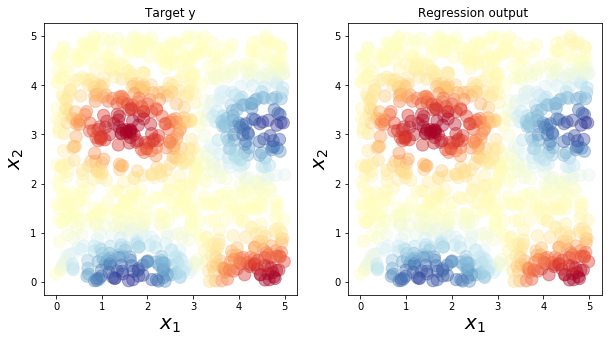

In [42]:
f,ax = plt.subplots(1,2,figsize=(10,5))
        

ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_pred[0].reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[1].set_title('Regression output ')
plt.tick_params(labelsize=10)